# Notebook #4: Estandización

In [137]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import pickle

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split


# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_scaling as ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo3/df_sinoutliers.pkl')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392
1,31,1,0.2576271186440678,0.1552734375,10,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.17532467532467533,0.2606060606060606,41890,0.0,23,0.14913657770800628,6.0,0.1727447216890595,5,1,4,0.13778705636743216,0.16326530612244897,0.1794871794871795,0.15736040609137056,0.17647058823529413
2,32,0,0.2576271186440678,0.1552734375,17,0.15274463007159905,0.1111111111111111,0.16473072861668428,0.15315315315315314,0.16714697406340057,0.11748251748251748,193280,1.0,15,0.16666666666666666,5.0,0.17264957264957265,5,0,3,0.1461794019933555,0.16326530612244897,0.3253012048192771,0.15301724137931033,0.1568627450980392
3,38,0,0.0759493670886076,0.1552734375,2,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.14035087719298245,0.12962962962962962,0.11748251748251748,83210,3.0,11,0.16666666666666666,13.0,0.1328125,8,7,5,0.13390928725701945,0.11270491803278689,0.139186295503212,0.15736040609137056,0.1568627450980392
4,32,0,0.14581458145814583,0.1552734375,10,0.14917127071823205,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.16714697406340057,0.2606060606060606,23420,4.0,12,0.1696969696969697,9.0,0.17264957264957265,6,0,4,0.13390928725701945,0.2292358803986711,0.139186295503212,0.15301724137931033,0.1568627450980392


In [139]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [140]:
df_escaladores_graf = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [141]:
df_escaladores_graf

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_robust,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,Age_minmax,DistanceFromHome_minmax,MonthlyIncome_minmax,NumCompaniesWorked_minmax,PercentSalaryHike_minmax,TotalWorkingYears_minmax,YearsAtCompany_minmax,YearsSinceLastPromotion_minmax,YearsWithCurrManager_minmax,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard,Age_normalizer,DistanceFromHome_normalizer,MonthlyIncome_normalizer,NumCompaniesWorked_normalizer,PercentSalaryHike_normalizer,TotalWorkingYears_normalizer,YearsAtCompany_normalizer,YearsSinceLastPromotion_normalizer,YearsWithCurrManager_normalizer
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.333333,-0.083333,1.516192,-0.333333,-0.500000,-1.000000,-0.666667,-0.5,-0.6,0.785714,0.178571,0.637546,0.111111,0.000000,0.026316,0.027027,0.000000,0.000000,1.583685,-0.386038,1.418598,-0.675365,-1.152394,-1.341125,-1.008707,-0.687016,-1.155163,0.000389,0.000046,1.000000,0.000008,0.000084,0.000008,0.000008,0.000000,0.000000
1,31,1,0.2576271186440678,0.1552734375,10,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.17532467532467533,0.2606060606060606,41890,0.0,23,0.14913657770800628,6.0,0.1727447216890595,5,1,4,0.13778705636743216,0.16326530612244897,0.1794871794871795,0.15736040609137056,0.17647058823529413,-0.333333,0.250000,-0.131008,-0.666667,1.500000,-0.444444,0.000000,0.0,0.2,0.309524,0.321429,0.167457,0.000000,0.857143,0.157895,0.135135,0.066667,0.235294,-0.636314,0.108551,-0.488307,-1.079020,2.149098,-0.672980,-0.307313,-0.359986,-0.007967,0.000740,0.000239,1.000000,0.000000,0.000549,0.000143,0.000119,0.000024,0.000095
2,32,0,0.2576271186440678,0.1552734375,17,0.15274463007159905,0.1111111111111111,0.16473072861668428,0.15315315315315314,0.16714697406340057,0.11748251748251748,193280,1.0,15,0.16666666666666666,5.0,0.17264957264957265,5,0,3,0.1461794019933555,0.16326530612244897,0.3253012048192771,0.15301724137931033,0.1568627450980392,-0.250000,0.833333,2.662423,-0.333333,0.166667,-0.555556,0.000000,-0.5,0.0,0.333333,0.571429,0.964666,0.111111,0.285714,0.131579,0.135135,0.000000,0.176471,-0.525314,0.974080,2.745549,-0.675365,-0.051897,-0.806609,-0.307313,-0.687016,-0.294766,0.000166,0.000088,1.000000,0.000005,0.000078,0.000026,0.000026,0.000000,0.000016
3,38,0,0.0759493670886076,0.1552734375,2,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.14035087719298245,0.12962962962962962,0.11748251748251748,83210,3.0,11,0.16666666666666666,13.0,0.1328125,8,7,5,0.13390928725701945,0.11270491803278689,0.139186295503212,0.15736040609137056,0.1568627450980392,0.250000,-0.416667,0.631424,0.333333,-0.500000,0.333333,0.500000,3.0,0.4,0.476190,0.035714,0.385045,0.333333,0.000000,0.342105,0.216216,0.466667,0.294118,0.140686,-0.880626,0.394334,0.131944,-1.152394,0.262424,0.218732,1.602191,0.278833,0.000457,0.000024,1.000000,0.000036,0.000132,0.000156,0.000096,0.000084,0.000060
4,32,0,0.14581458145814583,0.1552734375,10,0.14917127071823205,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.1671469

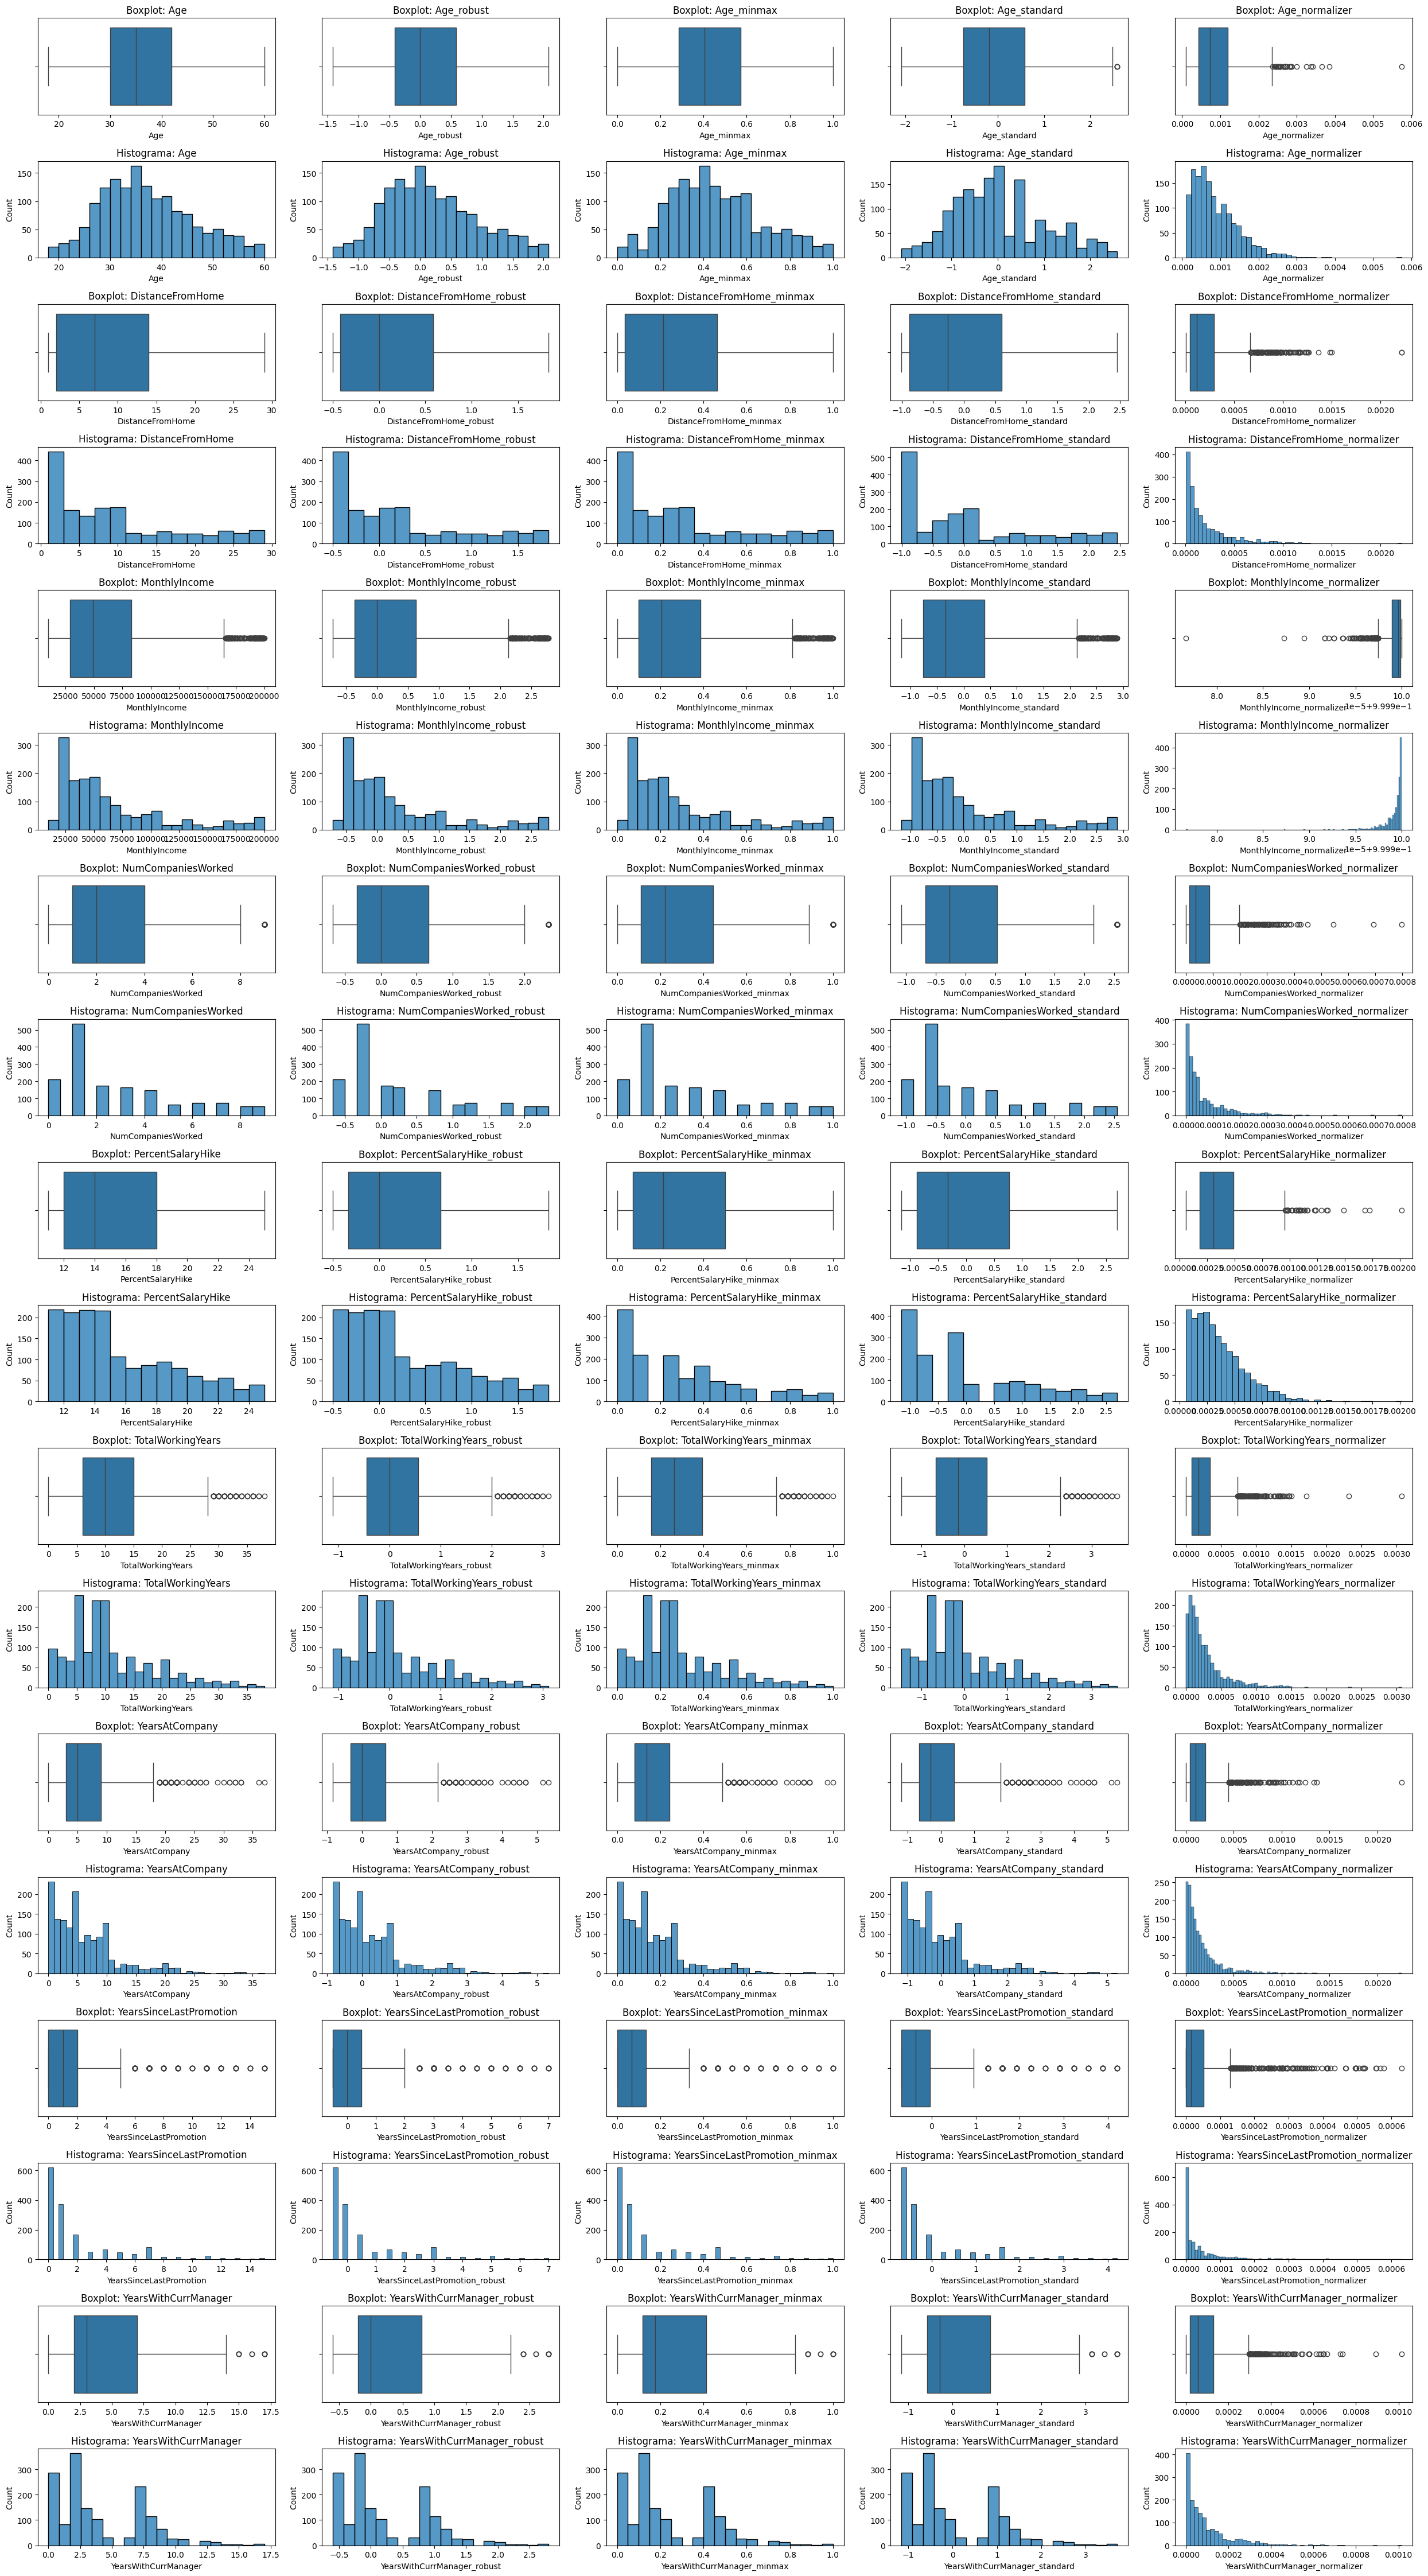

In [142]:
ss.graficar_escaladores(df_escaladores_graf, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], ['Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_minmax', 'YearsWithCurrManager_minmax',
       'Age_standard', 'DistanceFromHome_standard', 'MonthlyIncome_standard',
       'NumCompaniesWorked_standard', 'PercentSalaryHike_standard',
       'TotalWorkingYears_standard', 'YearsAtCompany_standard',
       'YearsSinceLastPromotion_standard', 'YearsWithCurrManager_standard',
       'Age_normalizer', 'DistanceFromHome_normalizer',
       'MonthlyIncome_normalizer', 'NumCompaniesWorked_normalizer',
       'PercentSalaryHike_normalizer', 'TotalWorkingYears_normalizer',
       'YearsAtCompany_normalizer', 'YearsSinceLastPromotion_normalizer',
       'YearsWithCurrManager_normalizer'])

- Nos quedaremos con el StandardScaler, dado que, en las gráficas no se observan grandes diferencias y, lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [143]:
df_standard = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [StandardScaler()])
df_standard.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.583685,-0.386038,1.418598,-0.675365,-1.152394,-1.341125,-1.008707,-0.687016,-1.155163


- Eliminamos las columnas originales.

In [144]:
df_standard.drop(columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], inplace=True)
df_standard.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.14581458145814583,0.14736842105263157,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,0.16666666666666666,0.057971014492753624,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.583685,-0.386038,1.418598,-0.675365,-1.152394,-1.341125,-1.008707,-0.687016,-1.155163


# Smote tomek

In [145]:
df = df_standard
X = df.drop(columns = "Attrition")
y = df["Attrition"]


In [146]:
from collections import Counter

df = df_standard
X = df.drop(columns = "Attrition")
y = df["Attrition"]

tomek = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_sampled, y_sampled = tomek.fit_resample(X, y)

resampled_df = pd.DataFrame(X_sampled, columns=X.columns)
resampled_df["Attrition"] = y_sampled

print("Original DataFrame:", df.shape)
print("Resampled DataFrame:", resampled_df.shape)

original_counts = Counter(df["Attrition"])
resampled_counts = Counter(resampled_df["Attrition"])

print("Original:", original_counts)
print("Resampled:", resampled_counts)

Original DataFrame: (1548, 25)
Resampled DataFrame: (1465, 25)
Original: Counter({'0': 1302, '1': 246})
Resampled: Counter({'0': 1219, '1': 246})


In [147]:
df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating', 'Age_standard', 'DistanceFromHome_standard',
       'MonthlyIncome_standard', 'NumCompaniesWorked_standard',
       'PercentSalaryHike_standard', 'TotalWorkingYears_standard',
       'YearsAtCompany_standard', 'YearsSinceLastPromotion_standard',
       'YearsWithCurrManager_standard'],
      dtype='object')

In [148]:
lista_cat = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education',
'EducationField', 'JobLevel', 'MaritalStatus', 'StockOptionLevel', 'TrainingTimesLastYear', 'JobInvolvement',
'PerformanceRating', 'NumCompaniesWorked_standard', 'PercentSalaryHike_standard', 'TotalWorkingYears_standard',
       'YearsAtCompany_standard', 'YearsSinceLastPromotion_standard',
       'YearsWithCurrManager_standard']

# aplicamos el smotenc
smotenc = SMOTENC(categorical_features=lista_cat, random_state=42, k_neighbors=5, sampling_strategy=0.7) 
X_resampled, y_resampled = smotenc.fit_resample(df, y)

# Mostrar el dataset balanceado
resampled_data = pd.DataFrame(X_resampled, columns=df.columns)
resampled_data['Attrition'] = y_resampled

resampled_data.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.14581458145814583,0.14736842105263157,0.18874172185430463,0.16486902927580893,0.15235,0.14776632302405499,0.144828,0.11748251748251748,0.16666666666666666,0.057971014492753624,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.583685,-0.386038,1.418598,-0.675365,-1.152394,-1.341125,-1.008707,-0.687016,-1.155163


In [ ]:
value_counts = resampled_data["Attrition"].value_counts()
percentages = resampled_data["Attrition"].value_counts(normalize=True) * 100

print("\Porcentajes:\n", percentages)


Percentages:
 Attrition
0    58.834162
1    41.165838
Name: proportion, dtype: float64


In [150]:
with open('../../datos/pickles_transformados/modelo3/df_estandarizado.pkl', 'wb') as f:
    pickle.dump(resampled_data, f)